In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '../input/imagenet-new/train'
test_dir = '../input/imagenet-new/train'

create image data generator object

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255)


#read images
train = train_datagen.flow_from_directory(train_dir, target_size=(64,64))

Found 5000 images belonging to 10 classes.


In [16]:
type(train)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [8]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [63]:
# build model

model = Sequential()

model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,258 (63.51 KB)

 Trainable params: 16,258 (63.51 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [65]:
hist = model.fit(train, epochs=10, batch_size=1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.1398 - loss: 2.2459
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2944 - loss: 1.9596
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.3622 - loss: 1.8035
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3904 - loss: 1.7318
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4256 - loss: 1.6622
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4454 - loss: 1.5975
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4650 - loss: 1.5351
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4838 - loss: 1.4771
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4962 - loss: 1.4523
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5098 - loss: 1.4227


In [66]:
# val = ImageDataGenerator(rescale=1.0/255)
# val = val.flow_from_directory()

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('../input/imagenet-new/val/images/val_192.JPEG')
cv2.imshow("makda man",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = img1 / 255
img1 = img1.reshape(1,64,64,3)
pred = model.predict(img1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [68]:
res = dict((v,k) for k,v in train.class_indices.items())
res

{0: 'crocodile',
 1: 'fish',
 2: 'fossils',
 3: 'frog',
 4: 'insect',
 5: 'reptiles',
 6: 'scorpion',
 7: 'snake',
 8: 'spider',
 9: 'toad'}

In [69]:
pred[0].argmax()

np.int64(8)

In [70]:
print(res[pred[0].argmax()])

spider


In [71]:
img = plt.imread('../input/imagenet-new/val/images/val_192.JPEG')
imgg = img.copy()
img = img/255
img = img.reshape(1,64,64,3)
pred = model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


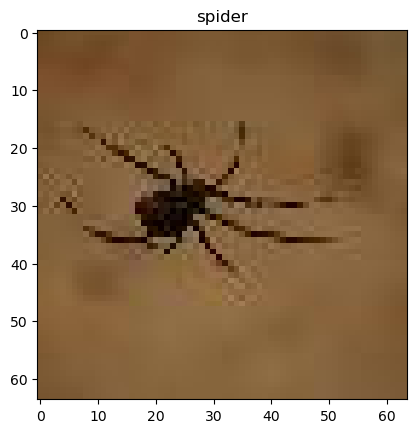

In [72]:
plt.title(f'{res[pred[0].argmax()]}')
plt.imshow(imgg)